# The Python Ecosystem for Scientific Computing

### A quick overview [...]

## Python

### Why performing scientific computing in Python ?

- Open-Source
- A real system-wide programming language
- Multi-platform (thanks to Anaconda, https://www.anaconda.com)
- Easy (interpreted language), compact and readable
- And still, sophisticated enough... Object-oriented, [...]

In [31]:
import os, sys
import matplotlib.pylab as plt
%matplotlib inline

# Numpy

numerical computation in python

http://www.numpy.org/

In [32]:
import numpy as np # numerical computation in python

#### mastering Numpy, an example...

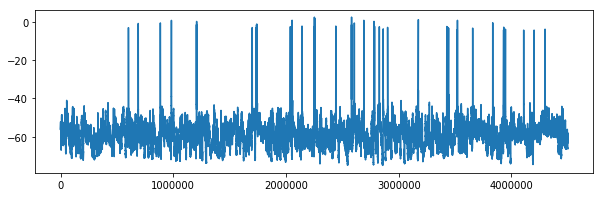

In [33]:
# let's load some data
Vm = np.fromfile('data'+os.path.sep+'intracellular.dat', dtype='float32')
# N.B. 'data/intracellular.dat' would be UNIX-compatible only !! 
# and 'data\intracellular.dat' would be MSWin-compatible only !!

# then just for visulaization purpose
plt.subplots(1, figsize=(10,3))
plt.plot(Vm);

In [34]:
# finding spikes 
threshold = -30 # positive crossing a given Vm threshold
# trying to do this in a compact way [...]
ispikes = np.argwhere((Vm[1:]>threshold) & (Vm[:-1]<threshold))
# a "one-liner" !!

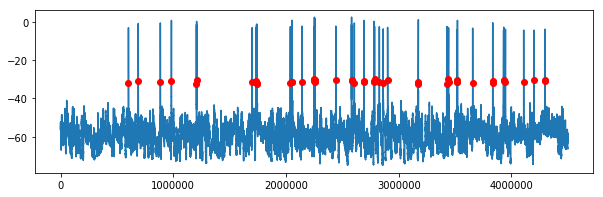

In [35]:
# does it work ?
plt.subplots(1, figsize=(10,3))
plt.plot(Vm);
plt.plot(np.arange(len(Vm))[ispikes], Vm[ispikes], 'ro')

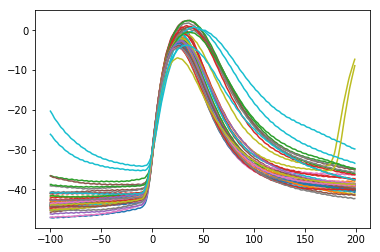

In [45]:
# let's look at it more closely...
window = np.arange(-100, 200)
for ispk in ispikes: # looping over spike indices
    plt.plot(window, Vm[ispk+window])

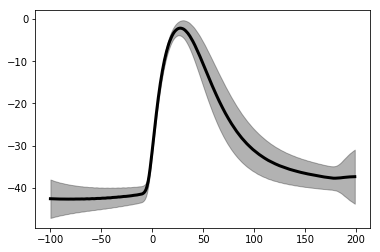

In [47]:
# making an array of those single spike events...
SPIKES = np.array([Vm[ispk+window] for ispk in ispikes])
# and playing with dimensions
plt.plot(window, SPIKES.mean(axis=0), 'k-', lw=3)
plt.fill_between(window,
    SPIKES.mean(axis=0)-SPIKES.std(axis=0),
    SPIKES.mean(axis=0)+SPIKES.std(axis=0), color='k', alpha=.3)

# Matplotlib

## publication quality figures -> from raw data to final figure file !

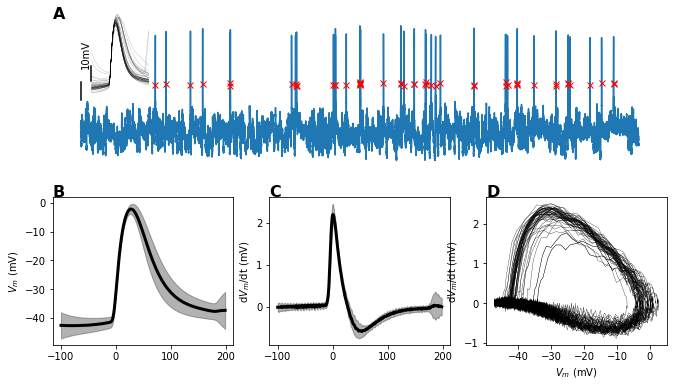

In [97]:

fig = plt.figure(figsize=(11,6))
ax1 = plt.subplot2grid((2,3), (0,0), colspan=4)
ax1.plot(Vm)
ax1.axis('off')
plt.plot(np.arange(len(Vm))[ispikes], Vm[ispikes], 'rx', ms=6)
ax1.plot([0,0], [-40,-30], 'k-');ax1.annotate('10mV', (0,-10), rotation=90)
ax11 = plt.axes([0.17,0.7,0.08,0.2])
ax11.plot([window[0],window[0]], [-40,-30], 'k-')
for ispk in ispikes: # looping over spike indices
    ax11.plot(window, Vm[ispk+window], 'k-', lw=.1)
ax11.axis('off')
ax2 = plt.subplot2grid((2,3), (1,0))
ax2.plot(window, SPIKES.mean(axis=0), 'k-', lw=3)
ax2.fill_between(window,
    SPIKES.mean(axis=0)-SPIKES.std(axis=0),
    SPIKES.mean(axis=0)+SPIKES.std(axis=0), color='k', alpha=.3)
ax2.set_ylabel('$V_m$ (mV)')

ax3 = plt.subplot2grid((2,3), (1,1))
dSPIKES = np.array([np.diff(spike) for spike in SPIKES]) # spike derivative
ax3.plot(window[:-1], dSPIKES.mean(axis=0), 'k-', lw=3)
ax3.fill_between(window[:-1],
    dSPIKES.mean(axis=0)-dSPIKES.std(axis=0),
    dSPIKES.mean(axis=0)+dSPIKES.std(axis=0), color='k', alpha=.3)
ax3.set_ylabel('d$V_m$/dt (mV)')

ax4 = plt.subplot2grid((2,3), (1,2))
for spike, dspike in zip(SPIKES, dSPIKES):
    ax4.plot(spike[:-1], dspike, 'k-', lw=.3)
ax4.set_xlabel('$V_m$ (mV)')
ax4.set_ylabel('d$V_m$/dt (mV)')

for label, ax in zip(['A', 'B', 'C', 'D'], [ax1, ax2, ax3, ax4]):
    ax.annotate(label, (0,1), xycoords='axes fraction', fontweight='bold', fontsize=16)
# then saving
fig.savefig('data/fig1.png')

# SciPy

## The module that combines various tools

- Special functions (scipy.special)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)
- Interpolation (scipy.interpolate)
- Fourier Transforms (scipy.fftpack)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Sparse Eigenvalue Problems with ARPACK
- Compressed Sparse Graph Routines (scipy.sparse.csgraph)
- Spatial data structures and algorithms (scipy.spatial)
- Statistics (scipy.stats)
- Multidimensional image processing (scipy.ndimage)
- File IO (scipy.io)
- [...]

# Sympy 

## the Python library for symbolic mathematics. 

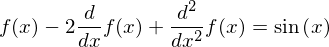

In [103]:
import sympy
sympy.init_printing()

x = sympy.symbols('x')
f, g = sympy.symbols('f g', cls=sympy.Function)
diffeq = sympy.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sympy.sin(x))
# We want to solve the following differential equation:
diffeq

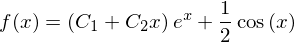

In [108]:
# well...
solution = sympy.dsolve(diffeq, f(x))
solution

In [132]:
# with first boudary conditions, F(0)=0
print('C1 = ')
sympy.solve(sympy.Eq(0,solution.rhs.replace(x,0)), 'C1')[0]

C1 = 


C2 = 


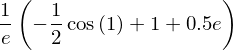

In [135]:
# and second boudary conditions, F(1)=1
print('C2 = ')
sympy.solve(sympy.Eq(1,solution.rhs.replace(x,1)), 'C2')[0].replace('C1',-1/2)

# Jupyter 

http://jupyter.org/


very convenient to perform research and disseminate it


See examples, one notebook per research papers:
https://github.com/yzerlaut/notebook_papers/blob/master/README.md

# Other [...]

- Pandas
- Scikit-Learn 
- [...]

# Version Control with Git

## What is version control ?

Version control systems are a category of software tools that help a team manage changes to source code over time.

Version control software keeps track of every modification to the code in a special kind of database.

If a mistake is made, developers can turn back the clock and compare earlier versions of the code to help fix the mistake while minimizing disruption to all team members.

## What is git ?

By far, the most widely used modern version control system in the world today is Git.

Git is a mature, actively maintained open source project originally developed in 2005 by Linus Torvalds, the famous creator of the Linux operating system kernel.

### For scientists ?

A typical workflow in a scientific project:

- Project design
- Collecting preliminary data
- Making an early draft with the raw data of "Exp#3" where the phenomena is very nicely visible, this result is Figure 1
- Massively collecting data to question statistical significance of the effect
- This involves major reformatting of the source code, dealing with exceptions, [...]
- Producing the population-analysis for the phenomena: Figure 2, Figure 3, Figure 4, [...]
- [...]
- Then re-running the code to produce Figure 1, and it doesn't work [...], either it crashes, or it gives different results, [...] anyway you're not able to reproduce Figure 1.
- Finding what has changed in the code can be very very very very time consuming...

If you have tracked your project with Git, the solution is very simple:

In [1]:
%%bash
# have a look at the history of the versions of your source code: "git log"
git log

commit 2e85e31ec4bb734f34ed12201f0d8443c673957e
Author: yzerlaut <yann.zerlaut@gmail.com>
Date:   Tue Jan 23 15:55:04 2018 +0100

    fancy data load handling exceptions

commit 99fdc8efeb2e04b46676939eb2a92f2fbcdd0b6e
Author: yzerlaut <yann.zerlaut@gmail.com>
Date:   Tue Jan 23 15:53:54 2018 +0100

    basic load function

commit 838099e33c47e8340c7abe3ea8d68614daa6150a
Author: yzerlaut <yann.zerlaut@gmail.com>
Date:   Tue Jan 23 15:52:45 2018 +0100

    adding random data

commit d206110016c0de54096f805ca3d939248824c25c
Author: yzerlaut <yann.zerlaut@gmail.com>
Date:   Tue Jan 23 15:48:03 2018 +0100

    advanced use

commit 45fc8fb9430637d2c286441ce45a0cd555ce84da
Author: yzerlaut <yann.zerlaut@gmail.com>
Date:   Tue Jan 23 15:45:00 2018 +0100

    adding intra data for illustration

commit 309d283dec3cc8c3056cfcfd66398ca2be78ea1f
Author: yzerlaut <yann.zerlaut@gmail.com>
Date:   Tue Jan 23 15:44:47 2018 +0100

    done with the introductory course

commit a155e21eac2734f8297b9594d2

I know that on Thursday January 18th at 4pm I had it working [...] (e.g. from my emails, I sent the draft)

we identify the commit that corresponds to that date, it is:


"9e4b7c6caa76457ec7eb557558ed5edb5adb9a11"

##### So let's travel back in time, and get to that version of the code:

with "git checkout 9e4b7"

(only the first few numbers matter)

In [149]:
%%bash
git checkout 99fdc8ef

HEAD is now at 9e4b7c6... A simple jupyter notebook to explain k-means and run code for image compression


In [ ]:
# now run the code 
%%bash
python script_that_produces_my_figure_1_and_depends_on_modules.py

It **will** produce the exact same output than initially 

(except if the bug is due to a software update or a change in the data)

Then you can look at the difference between your current source code and the initial one to identify the source of the problem

In [2]:
%%bash
git diff 99fdc8ef

diff --git a/data/random.py b/data/random.py
index d29921d..66b7b5b 100644
--- a/data/random.py
+++ b/data/random.py
@@ -1,3 +1,8 @@
+from data_analysis import low_pass
+
 def function_to_load_data(filename):
     # simple reading of binary
-    return np.fromfile(filename, dtype='float32')
+    data = np.fromfile(filename, dtype='float32')
+    # but low pass filtering
+    new_data = low_pass(data)
+    return new_data


### For scientists ?

Of course, for collaborative source code production

e.g. 1) what happens if two people touch two **different** functions in the same file at the same time ? 

or 2) what happens if two people touch the **same** function in the same file at the same time ?

**Git** is smart, in 1) it will merge the two files, in 2) it will ask you to manually solve the problem

## Let's do a tutorial:

https://try.github.io

When you track a source code with git, you code lies on four different levels:

- The files on disk
- the staging area
- the committed version
- the server copy

## advanced use of Git: 

- branches, merge, etc...

- submodules: e.g. https://github.com/yzerlaut/notebook_papers



In [3]:
%%bash
git fetch upstream
git checkout master
git merge upstream/master

M	SciPy_Overview_and_Version_Control.ipynb
Your branch is ahead of 'origin/master' by 3 commits.
  (use "git push" to publish your local commits)


fatal: 'upstream' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
Already on 'master'
merge: upstream/master - not something we can merge
